## Visualizations for DTSC 1302 Final Project: College Affordability
*Developed by Arnav Sareen and Group 16*

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import base64
from io import BytesIO
from great_tables import GT, md, html, system_fonts, style, loc
from great_tables import px as pixel
import shutil
import os
from fuzzywuzzy import process

In [2]:
# Load overall college data 
college_data: pd.DataFrame = pd.read_csv('College_Data (1).csv')
nc_colleges_list: dict = {
    "Appalachian State University": '#FFD200',
    "Belmont Abbey College": "#B8202D",
    "Campbell University": "#EA7125",
    "Catawba College": "#02216E",
    "Davidson College": "#D42121",
    "Duke University": "#00539B",
    "Elon College": "#73000A",
    "Gardner Webb University": "#BB0000",
    "Greensboro College": "#126649",
    "Guilford College": "#981b36",
    "Lenoir-Rhyne College": "#a31f34",
    "Montreat-Anderson College": "#0a2240",
    "North Carolina Wesleyan College": "#D7A900",
    "Pfeiffer College": "#ffc627",
    "Queens College": "#243167",
    "Wake Forest University": "#a67f31",
    "East Carolina University": "#592A8A",
    "Fayetteville State University": "#0067b1",
    "North Carolina A. & T. State University": "#004684",
    "North Carolina State University at Raleigh": "#CC0000",
    "University of North Carolina at Asheville": "#003DA5",
    "University of North Carolina at Chapel Hill": "#7BAFD4",
    "University of North Carolina at Charlotte": "#005035",
    "University of North Carolina at Greensboro": "#ffb71b",
    "University of North Carolina at Wilmington": "#006666",
    "Pembroke State University": "#8d734a",
    "Western Carolina University": "#592C88"
}

# Filter college data by relevant NC Colleges
nc_colleges: pd.DataFrame = college_data.loc[college_data['Name'].isin(nc_colleges_list.keys())]

# Add the image paths
photo_paths = list(map(lambda x: f'./logos/{"-".join(x.lower().split(' '))}.png', nc_colleges['Name'].to_numpy()))

nc_colleges['Photo'] = photo_paths
nc_colleges['Color'] = [nc_colleges_list[college] for college in nc_colleges['Name'].to_numpy()]

C:\Users\ernie\AppData\Local\Temp\ipykernel_16352\178678668.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_colleges['Photo'] = photo_paths
C:\Users\ernie\AppData\Local\Temp\ipykernel_16352\178678668.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_colleges['Color'] = [nc_colleges_list[college] for college in nc_colleges['Name'].to_numpy()]


In [3]:
nc_colleges

Name Private   Apps  Accept  \
21                  Appalachian State University      No   7313    4664   
42                         Belmont Abbey College     Yes    632     494   
81                           Campbell University     Yes   2087    1339   
93                               Catawba College     Yes   1083     880   
159                             Davidson College     Yes   2373     956   
174                              Duke University     Yes  13789    3893   
176                     East Carolina University      No   9274    6362   
188                                 Elon College     Yes   3624    2786   
197                Fayetteville State University      No   1455    1064   
215                      Gardner Webb University     Yes   1110     930   
235                           Greensboro College     Yes    608     494   
239                             Guilford College     Yes   1202    1054   
310                         Lenoir-Rhyne College     Yes    979     743   
384                    Montreat-Anderson College     Yes    263     223   
411      North Carolina A. & T. State University      No   4809    3089   
412   North Carolina State University at Raleigh      No  10634    7064   
413              North Carolina Wesleyan College     Yes    812     689   
444                    Pembroke State University      No    944     774   
448                             Pfeiffer College     Yes    838     651   
462                               Queens College     Yes    516     392   
650    University of North Carolina at Asheville      No   1757     979   
651  University of North Carolina at Chapel Hill      No  14596    5985   
652    University of North Carolina at Charlotte      No   5803    4441   
653   University of North Carolina at Greensboro      No   5191    4134   
654   University of North Carolina at Wilmington      No   6071    3856   
720                       Wake Forest University     Yes   5661    2392   
741                  Western Carolina University      No   3224    2519   

     Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  ...  \
21     1910         20         63         9940         1035      6806  ...   
42      129         17         36          709          131      9000  ...   
81      657         20         54         3191         1204      7550  ...   
93      291         13         34          915           80      9270  ...   
159     452         77         96         1601            6     17295  ...   
174    1583         90         98         6188           53     18590  ...   
176    2435         14         44        13171         1687      7248  ...   
188     858         11         39         2933          334      9100  ...   
197     452          1         16         2632          617      6806  ...   
215     332         18         36         1603          374      8180  ...   
235     176         10         31          649          314      8330  ...   
239     326         18         44         1410          299     13404  ...   
310     259         25         46         1188          166     10100  ...   
384     103         10         24          316           20      8438  ...   
411    1429         12         33         6162          871      6806  ...   
412    3176         39         78        16505         5481      8400  ...   
413     195          7         24          646           84      8242  ...   
444     440         14         34         2174          529      6360  ...   
448     159         11         25          654          162      8640  ...   
462     154         32         62          630          549     11020  ...   
650     394         32         74         2033         1078      5972  ...   
651    3331         75         92        14609         1100      8400  ...   
652    1730         19         62        10099         3255      7248  ...   
653    1500         15         44         7532         1847      8677  

In [4]:
college_expenses: np.ndarray = nc_colleges['Room.Board'] + nc_colleges['Books'] + nc_colleges['Outstate']
nc_colleges['College Expenses'] = college_expenses
nc_colleges = nc_colleges.reset_index(drop=True)

C:\Users\ernie\AppData\Local\Temp\ipykernel_16352\3996830189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_colleges['College Expenses'] = college_expenses


In [5]:
def pil_to_base64(img):
    buffer = BytesIO()
    img.save(buffer, format="PNG")
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    return image_base64

In [6]:
# Create the initial scatterplot
expend_fig = px.scatter(nc_colleges, x='College Expenses', y='Personal', trendline='ols', trendline_color_override='black',  hover_data=["Name", "College Expenses", "Personal"])

# Make the markers for the scatterplot transparent
expend_fig.update_traces(marker=dict(size=0, color='rgba(0,0,0,0)'))

# Add the initial scatter points 
# expend_fig.add_trace(go.Scatter(
#     x = nc_colleges['College Expenses'],
#     y = nc_colleges['Personal'],
#     mode = 'markers+text',
#     textposition = 'top center',
#     marker=dict(size=20, color='rgba(0,0,0,0)'),
# ))

# Add the photos
for i, row in nc_colleges.iterrows():
    image_path = row['Photo']
    image = Image.open(image_path) 
    encoded_image = pil_to_base64(image) 
    expend_fig.add_layout_image(
        dict(
            x=row['College Expenses'],
            y=row['Personal'],
            source=f'data:image/png;base64,{encoded_image}',
            sizex = 2000,
            sizey = 600,
            xref = 'x',
            yref = 'y',
            xanchor = 'center',
            yanchor = 'middle'
    ))

# Layout adjustments
expend_fig.update_layout(
    xaxis=dict(range=[nc_colleges['College Expenses'].min() - 1000, nc_colleges['College Expenses'].max() + 1000], title=dict(text='College Expenses')),
    yaxis=dict(range=[nc_colleges['Personal'].min() - 1000, nc_colleges['Personal'].max() + 1000], title=dict(text='Personal Expenses')),
    title = dict(text='<b>College Expenses Versus Out-Of-Pocket Expenses at North Carolina Colleges</b>', font=dict(size=18), x = .5, xanchor='center'),
    showlegend=False,
    font_family = "Raleway, sans-serif",
    annotations=[
        dict(
            text='<em>The more expensive a college it is, the lower its personal costs, regardless if a college is a public or private institution.</em><br>',
            x=0.5,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
        font=dict(size=11)
        )
    ]
)

expend_fig.show()

In [ ]:
# Export the image
expend_fig.write_image("visualizations/college_versus_personal.png", scale=6)

#Save to html
expend_fig.write_html('html/college_versus_personal.html')

In [7]:
# Bar Chart by expenditure per student
ex_per_stu = go.Figure()
private_average = np.average(nc_colleges.loc[nc_colleges['Private'] == 'Yes']['Expend'].to_numpy())
public_average = np.average(nc_colleges.loc[nc_colleges['Private'] == 'No']['Expend'].to_numpy())

print(f"Public Average: {public_average}")
print(f"Private Average: {private_average}")
subtitle_text = rf"Private Schools on average spend &#36;{private_average:,.2f} per student compared to &#36;{public_average:,.2f} by public institutions."

nc_colleges_sorted = nc_colleges.sort_values(by='Expend', ascending=False)

# Add bar traces
ex_per_stu.add_trace(go.Bar(
    x=nc_colleges_sorted['Name'],
    y=nc_colleges_sorted['Expend'],
    name='Expenditure',
    marker_color=nc_colleges_sorted['Color']
))

# Set layout
ex_per_stu.update_layout(
    xaxis=dict(showticklabels=True, tickvals=nc_colleges['Name']),
    yaxis=dict(range=[-2000, nc_colleges_sorted['Expend'].max() + 1000]),
    showlegend=False,
)

# Add custom tick images
for i, row in nc_colleges_sorted.iterrows():
    image_path = row['Photo']
    image = Image.open(image_path)
    encoded_image = pil_to_base64(image)
    ex_per_stu.add_layout_image(
        dict(
            source=f"data:image/png;base64,{encoded_image}",
            xref="x",
            yref="paper",
            x=row['Name'],
            y= -.01,  
            sizex= 1.22,
            sizey= 1000,
            xanchor="center",
            yanchor="top",
        )
    )

ex_per_stu.update_layout(
    xaxis=dict(
        tickvals=[],  
        ticktext=[]   
    ),
    font_family = "Raleway, sans-serif",
    title = dict(text='<b>North Carolina Colleges by Expenditure Per Student</b>', font=dict(size=18), x = .5, xanchor='center'),
    annotations=[
        dict(
            text=f'<em>{subtitle_text}</em><br>',
            x=0.5,
            y=1.12,
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=11)
        )
    ]
)

ex_per_stu.show()

Public Average: 7842.75
Private Average: 12192.666666666666


In [ ]:
# Save to image
ex_per_stu.write_image("visualizations/colleges_by_expend.png", scale=6, engine="kaleido")

# Save to html
ex_per_stu.write_html('html/colleges_by_expend.html')

In [8]:
# Load in the race data
import re
nc_college_race = pd.read_csv('1998_race_data_nc_colleges.csv')

nc_college_race.columns = list(map(lambda x: re.sub(' +', ' ',x.split('(')[0].strip()), nc_college_race.columns))

nc_college_race = nc_college_race[['Institution Name', 'White non-Hispanic total', 'Black non-Hispanic total', 'Hispanic total', 'Asian or Pacific Islander total', 'American Indian/Alaska Native total']]

column_titles = ['Name', 'White', 'Black', 'Hispanic', 'Asian & Pacific Islanders', 'American Indian & Alaska Native']

nc_college_race.columns = column_titles

display(nc_college_race)

Name  White  Black  Hispanic  \
0                  Appalachian State University  11074    334        94   
1                         Belmont Abbey College    780     52        11   
2                           Campbell University   3485    776       250   
3                               Catawba College   1042    143        12   
4                              Davidson College   1413     89        40   
5                               Duke University   4202    535       268   
6                      East Carolina University  12114   1851       205   
7                               Elon University   3228    233        29   
8                 Fayetteville State University    695   2659       130   
9                       Gardner-Webb University   1983    298        25   
10                           Greensboro College    760    155        20   
11                             Guilford College   1186     99        42   
12                      Lenoir-Rhyne University   1284    103        18   
13                             Montreat College    807    153        10   
14        North Carolina A & T State University    398   5924        26   
15   North Carolina State University at Raleigh  17595   2273       343   
16           North Carolina Wesleyan University   1234    456        28   
17                          Pfeiffer University    741    170        16   
18               Queens University of Charlotte   1019    186        26   
19       University of North Carolina Asheville   2879    106        43   
20  University of North Carolina at Chapel Hill  12438   1720       175   
21    University of North Carolina at Charlotte  10438   2536       248   
22   University of North Carolina at Greensboro   7740   1732       130   
23     University of North Carolina at Pembroke   1547    436        58   
24      University of North Carolina Wilmington   8327    528       130   
25                       Wake Forest University   3485    336        43   
26                  Western Carolina University   4889    291        38   

    Asian & Pacific Islanders  American Indian & Alaska Native  
0                         103                               42  
1                           5                                6  
2                         102                               34  
3                           6                                5  
4                          30                                5  
5                         804                               18  
6                         252                               98  
7                          26                                6  
8                          64                               40  
9                          37                               11  
10                         11                                5  
11                         16                               15  
12                         24                                5  
13                          4                                8  
14                         42                               22  
15                       1091                              152  
16                         15                                7  
17                          7                                3  
18                         10                                8  
19                         33                               10  
20                        741                              107  
21                        595                               78  
22                        229                               45  
23                         36                              653  
24                        104                               62  
25                         84                               13  
26                         45                               99

In [9]:
def calculate_diversity_index(college):
    total_student = np.sum(college[1::].to_numpy(dtype="int64"))
    val = np.sum([((college[col] / total_student) ** 2) for col in column_titles[1::]])
    return round(1 - val, 2)

new_college_names = nc_college_race['Name'].tolist()
diversity_index = [calculate_diversity_index(college) for _, college in nc_college_race.iterrows()]
nc_college_race['Diversity Index'] = diversity_index

North Carolina Colleges by Racial Makeup 
 
 
 As Measured in 1998 
 
 
 Name 
 White 
 Black 
 Hispanic 
 Asian & Pacific Islanders 
 American Indian & Alaska Native 
 Diversity Index 
 
 
 
 
 
 11,074 
 334 
 94 
 103 
 42 
 0.09 
 
 
 
 780 
 52 
 11 
 5 
 6 
 0.16 
 
 
 
 3,485 
 776 
 250 
 102 
 34 
 0.41 
 
 
 
 1,042 
 143 
 12 
 6 
 5 
 0.24 
 
 
 
 1,413 
 89 
 40 
 30 
 5 
 0.19 
 
 
 
 4,202 
 535 
 268 
 804 
 18 
 0.45 
 
 
 
 12,114 
 1,851 
 205 
 252 
 98 
 0.29 
 
 
 
 3,228 
 233 
 29 
 26 
 6 
 0.16 
 
 
 
 695 
 2,659 
 130 
 64 
 40 
 0.41 
 
 
 
 1,983 
 298 
 25 
 37 
 11 
 0.27 
 
 
 
 760 
 155 
 20 
 11 
 5 
 0.33 
 
 
 
 1,186 
 99 
 42 
 16 
 15 
 0.23 
 
 
 
 1,284 
 103 
 18 
 24 
 5 
 0.19 
 
 
 
 807 
 153 
 10 
 4 
 8 
 0.3 
 
 
 
 398 
 5,924 
 26 
 42 
 22 
 0.14 
 
 
 
 17,595 
 2,273 
 343 
 1,091 
 152 
 0.31 
 
 
 
 1,234 
 456 
 28 
 15 
 7 
 0.43 
 
 
 
 741 
 170 
 16 
 7 
 3 
 0.34 
 
 
 
 1,019 
 186 
 26 
 10 
 8 
 0.31 
 
 
 
 2,879 
 106 
 43 
 33 
 10 
 0.12 
 
 
 
 12,438 
 1,720 
 175 
 741 
 107 
 0.31 
 
 
 
 10,438 
 2,536 
 248 
 595 
 78 
 0.4 
 
 
 
 7,740 
 1,732 
 130 
 229 
 45 
 0.35 
 
 
 
 1,547 
 436 
 58 
 36 
 653 
 0.6 
 
 
 
 8,327 
 528 
 130 
 104 
 62 
 0.17 
 
 
 
 3,485 
 336 
 43 
 84 
 13 
 0.22 
 
 
 
 4,889 
 291 
 38 
 45 
 99 
 0.17 
 
 
 
 
 
 Source: National Center for Educational Statistics (IPEDS) 
 


 
 The Diversity Index measures how diverse a population is by subtracting the sum of the squared proportions of each racial group from 1, where higher values mean more diversity (as defined by the US Census )
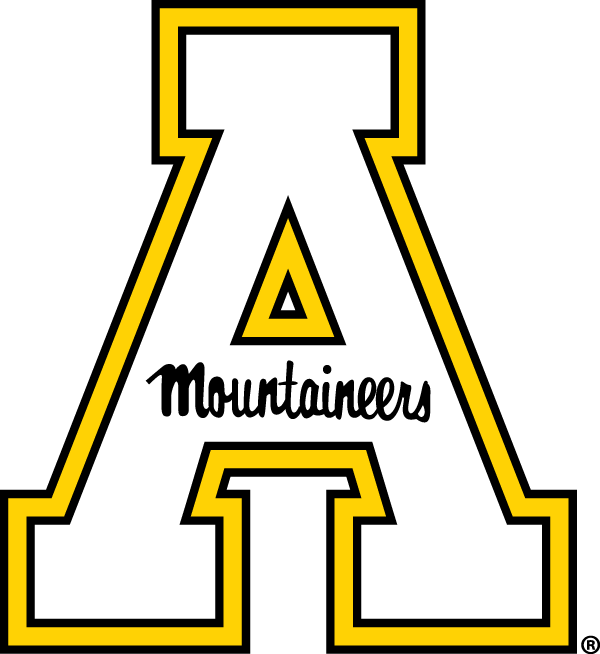
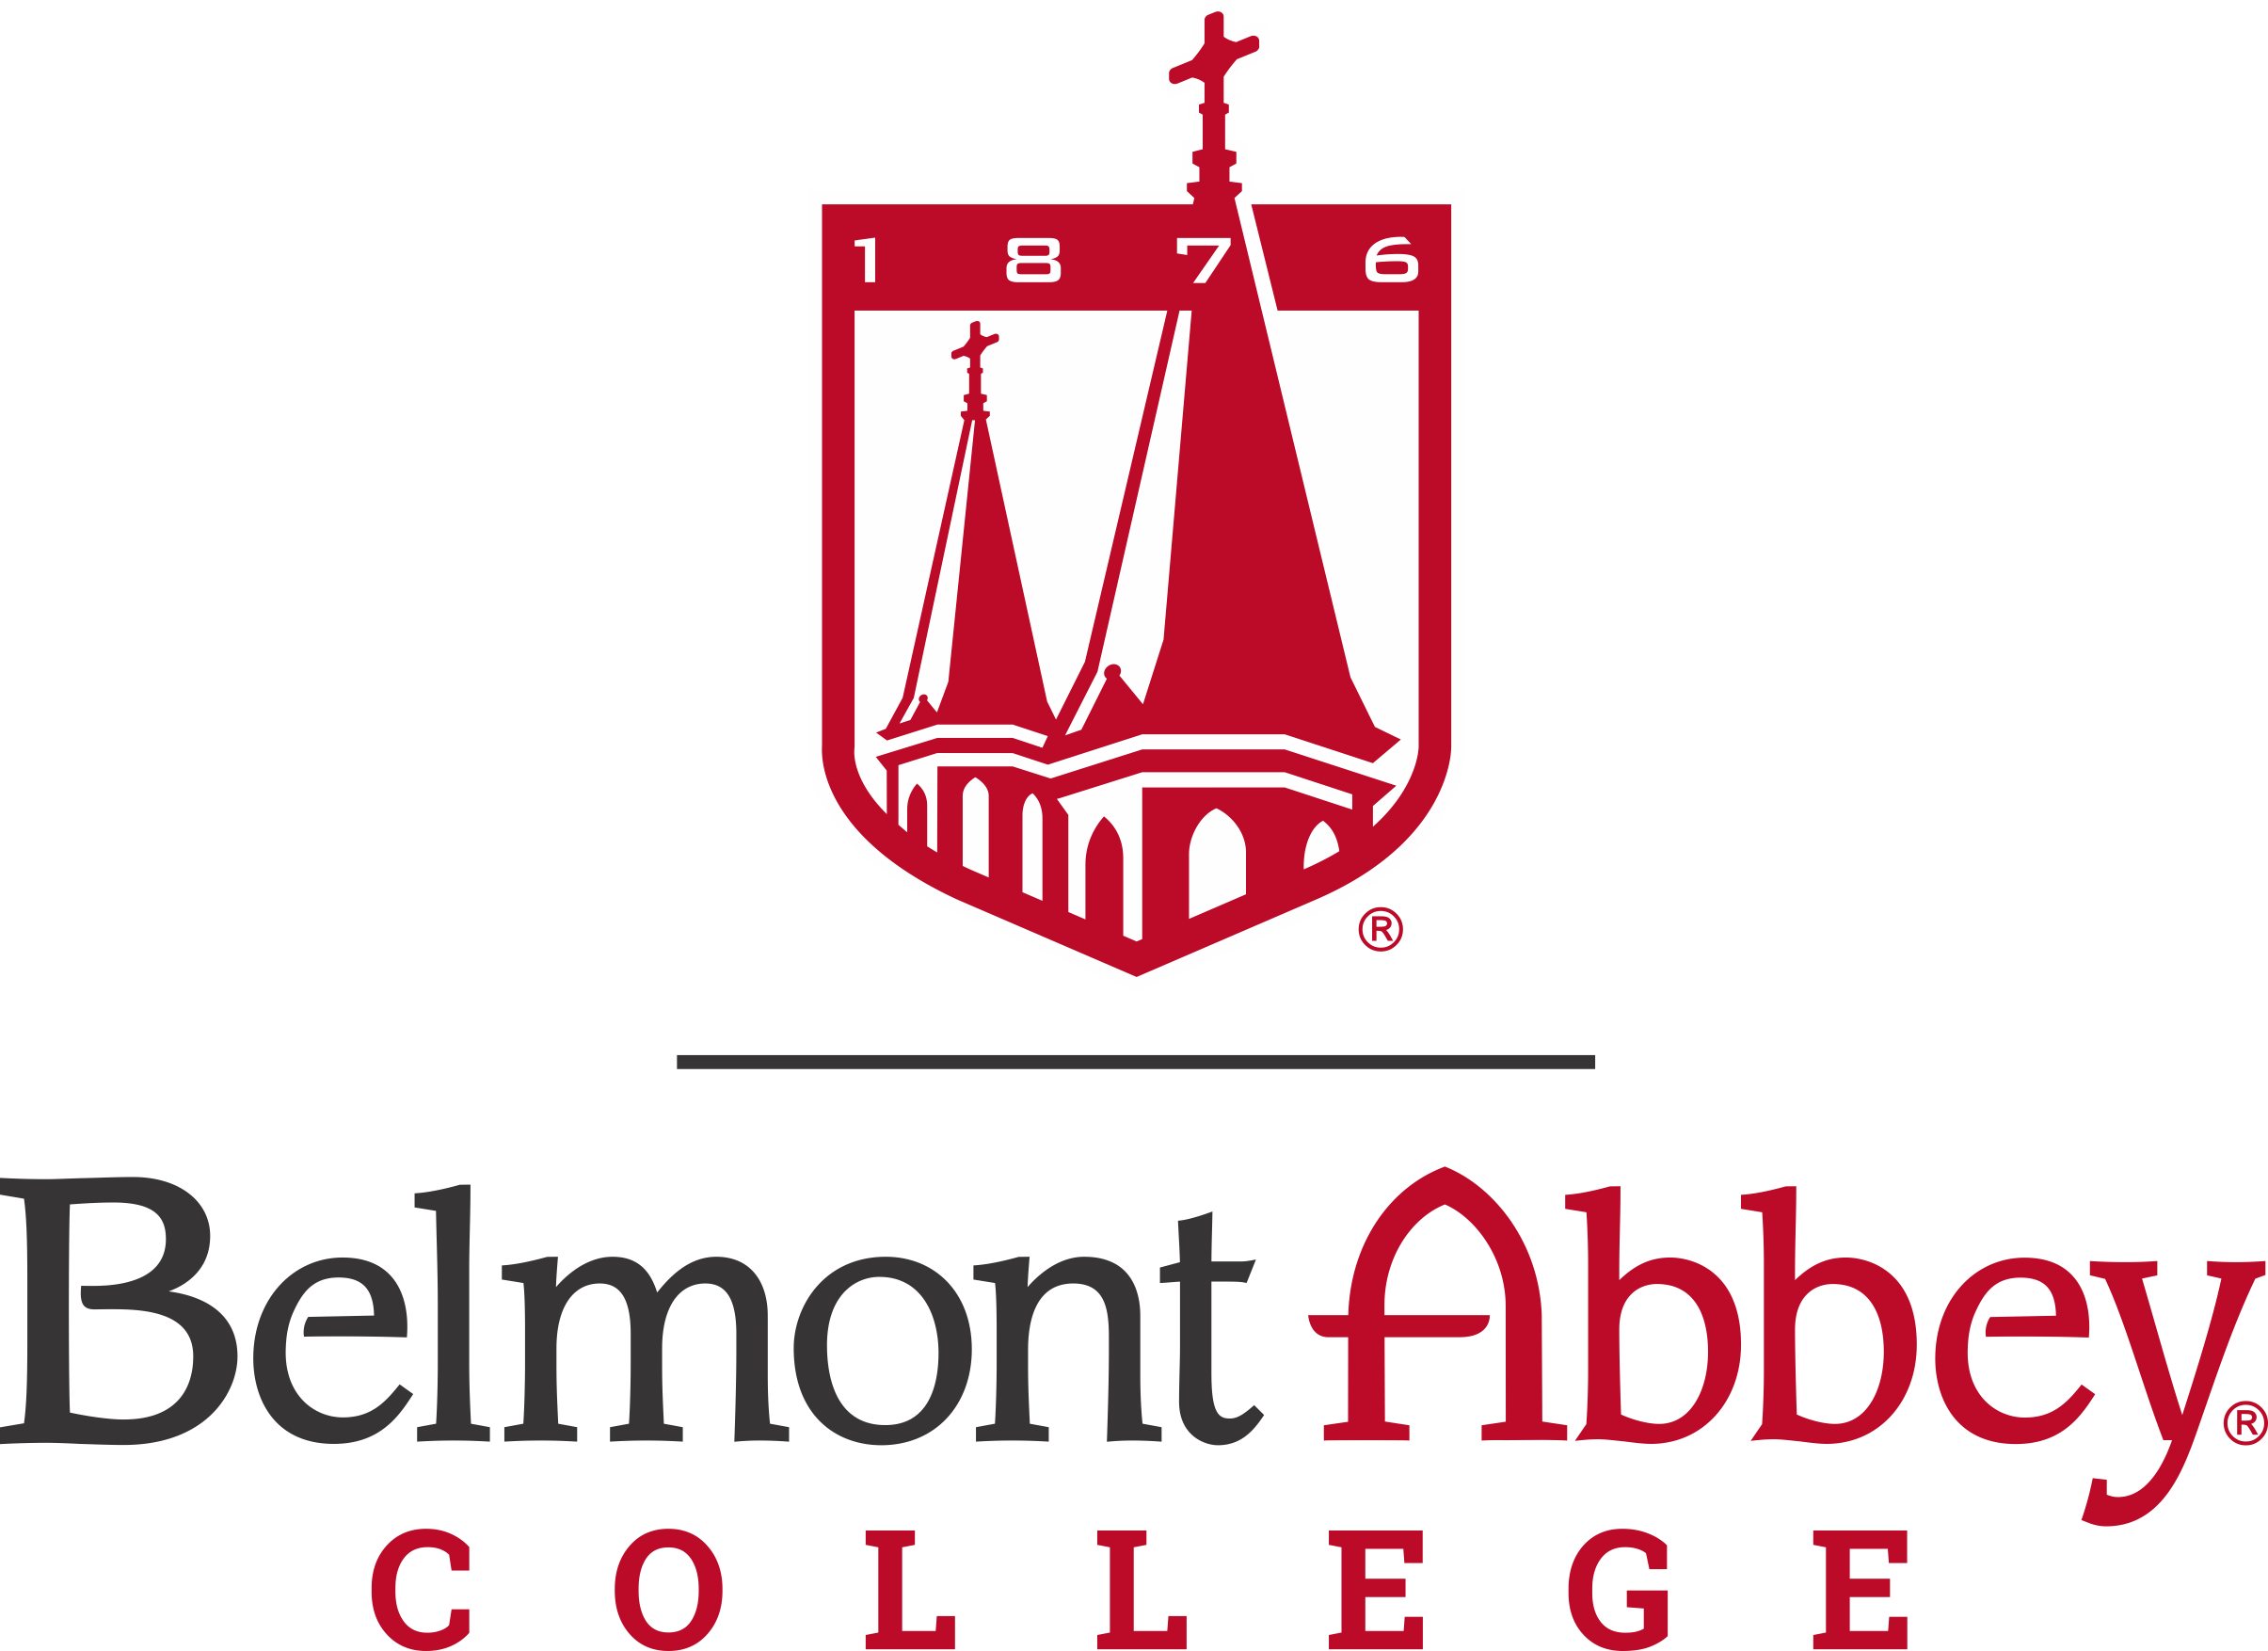
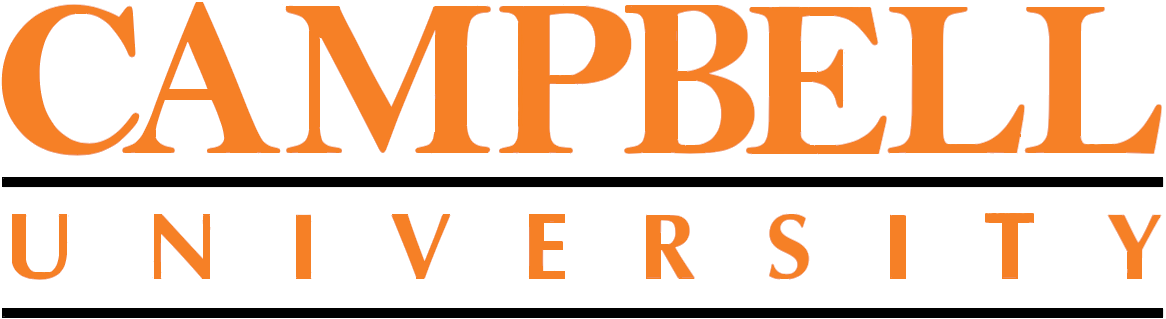
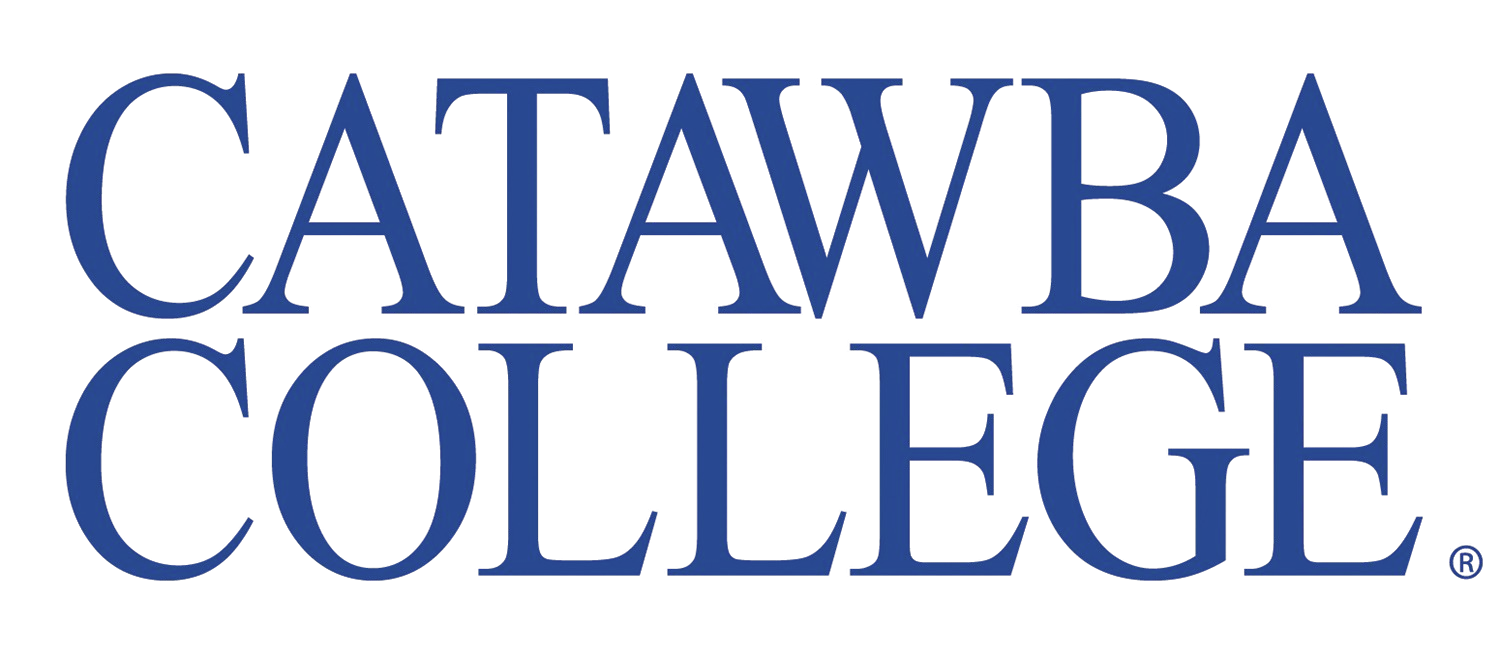
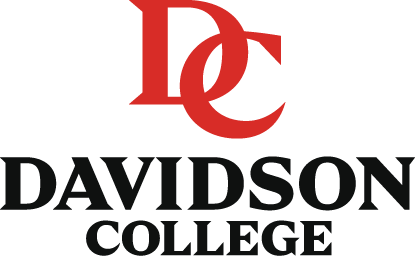
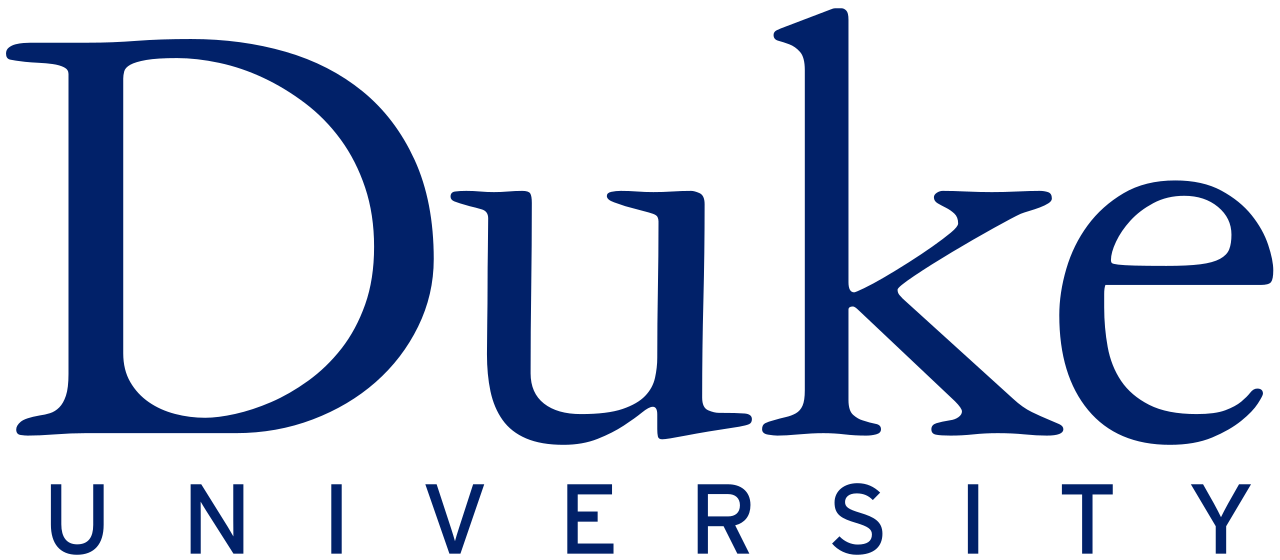
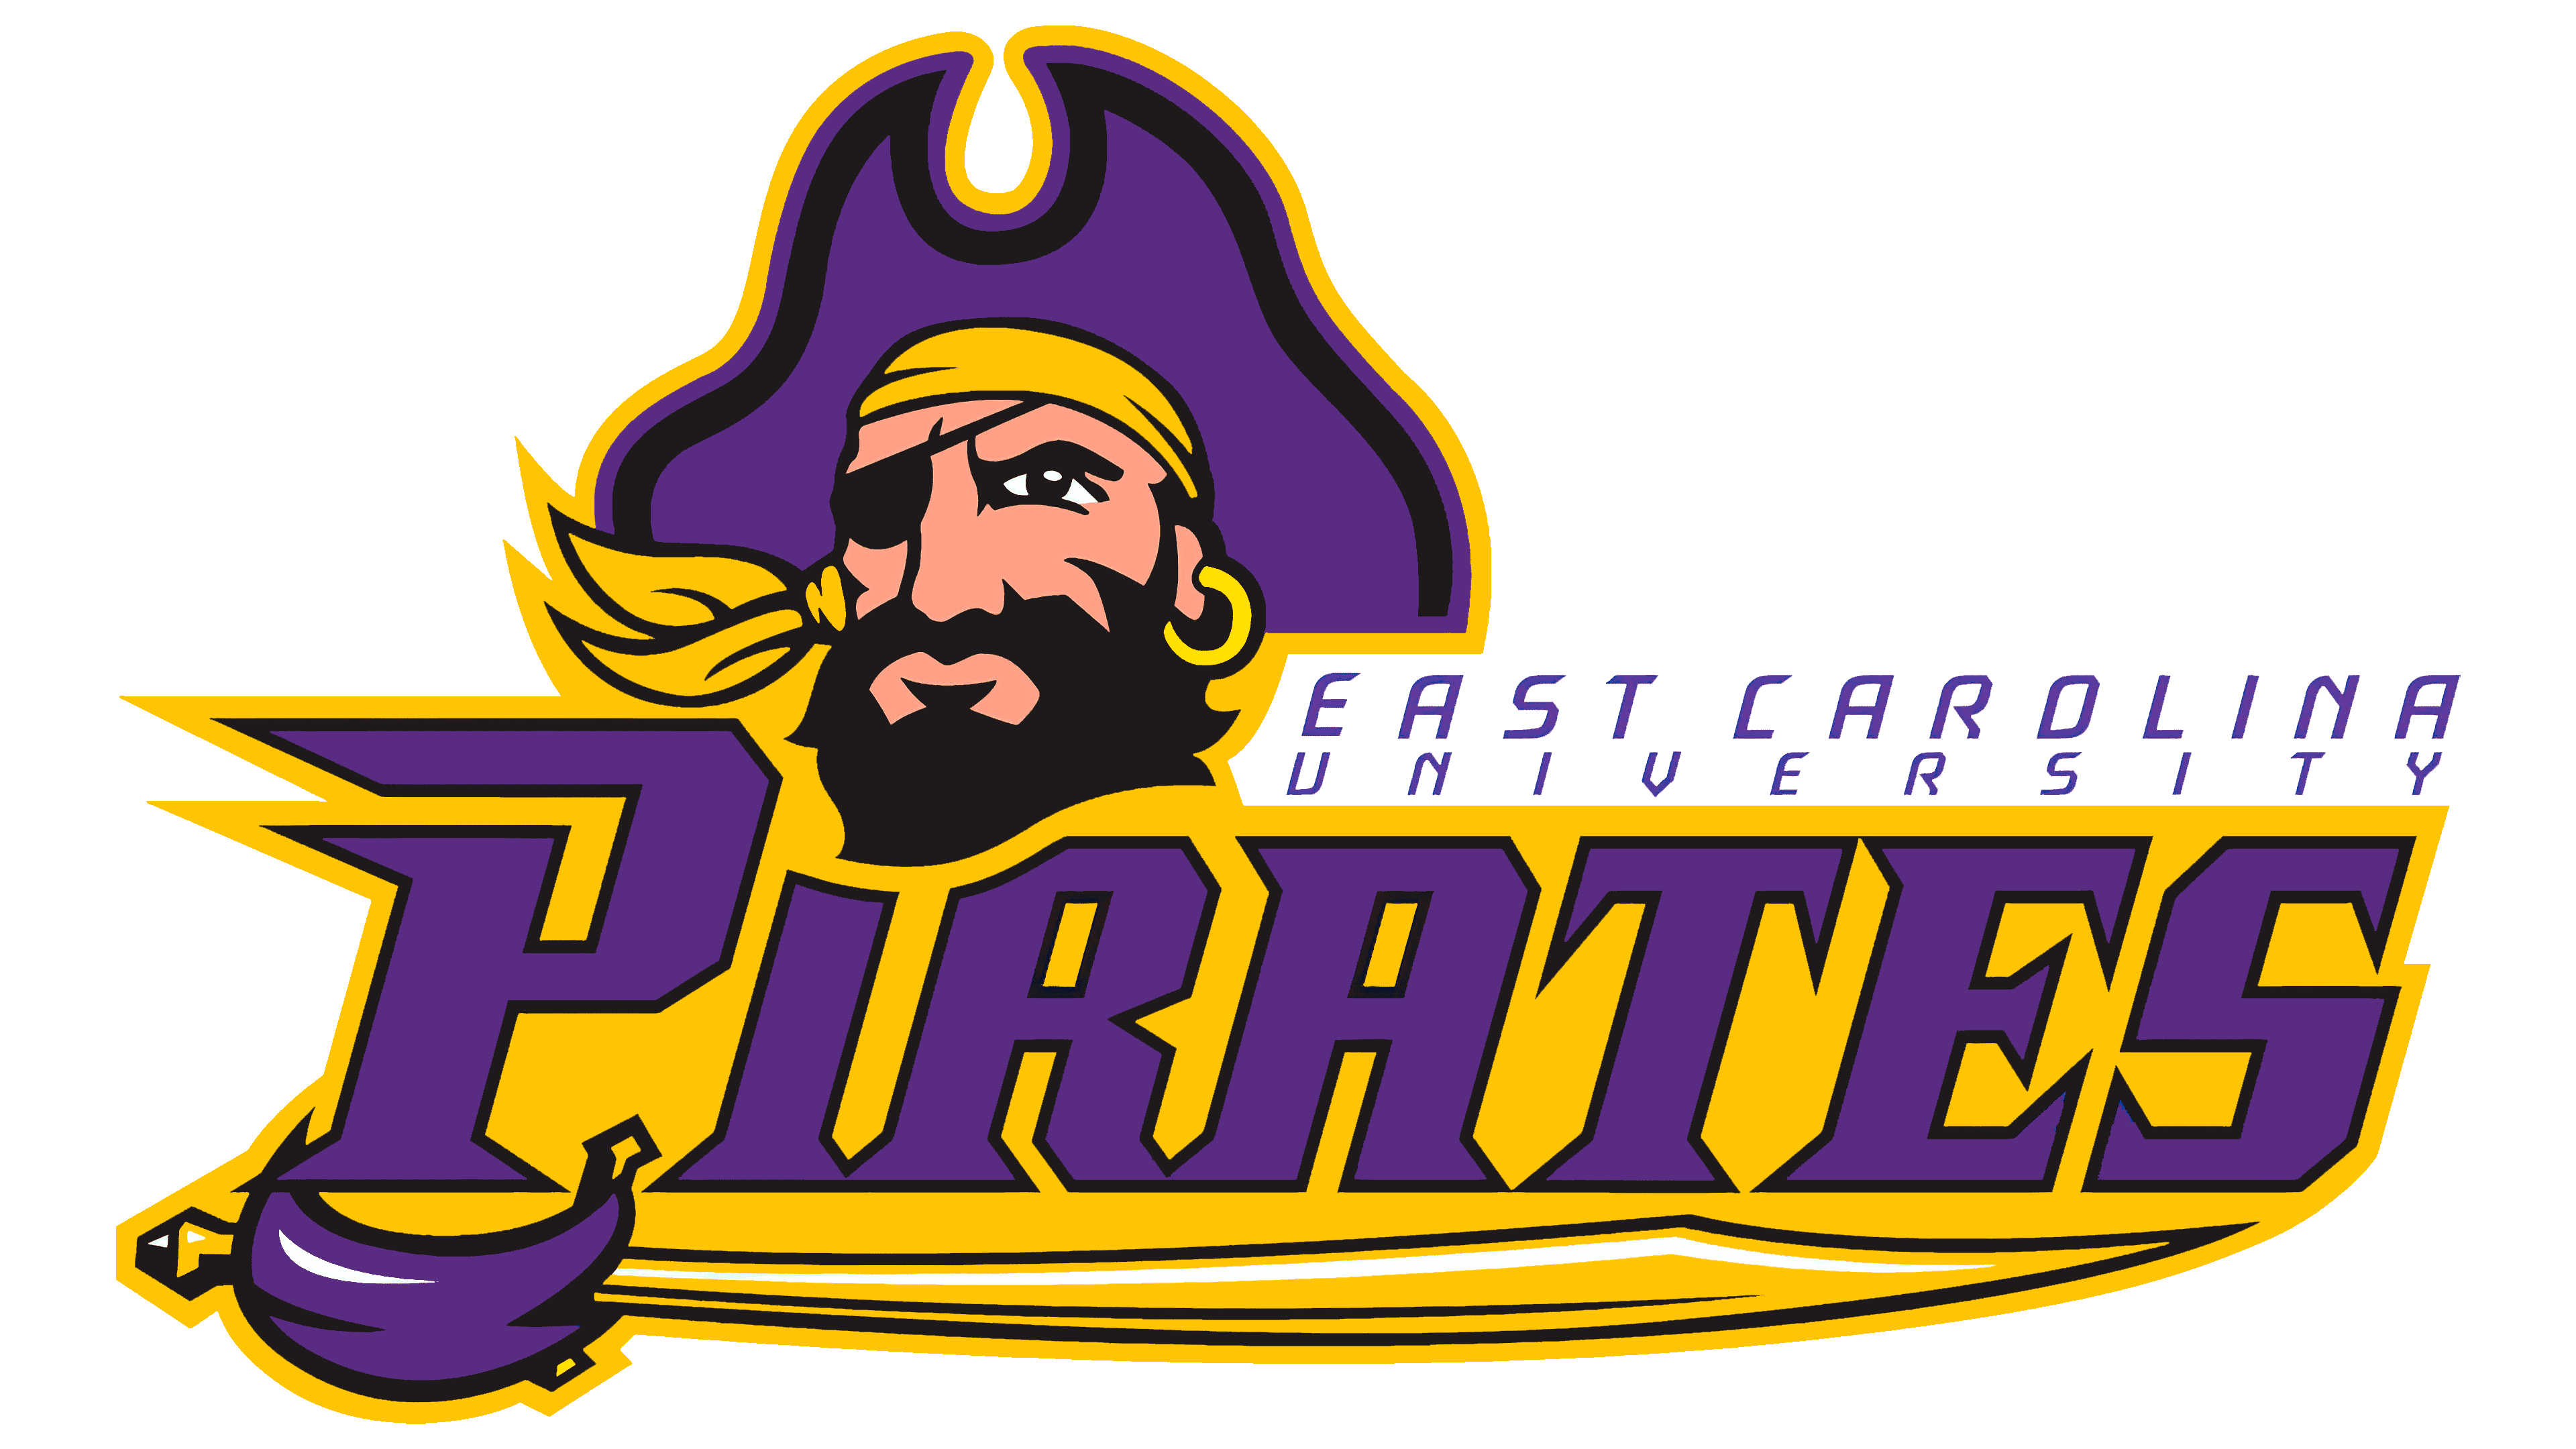
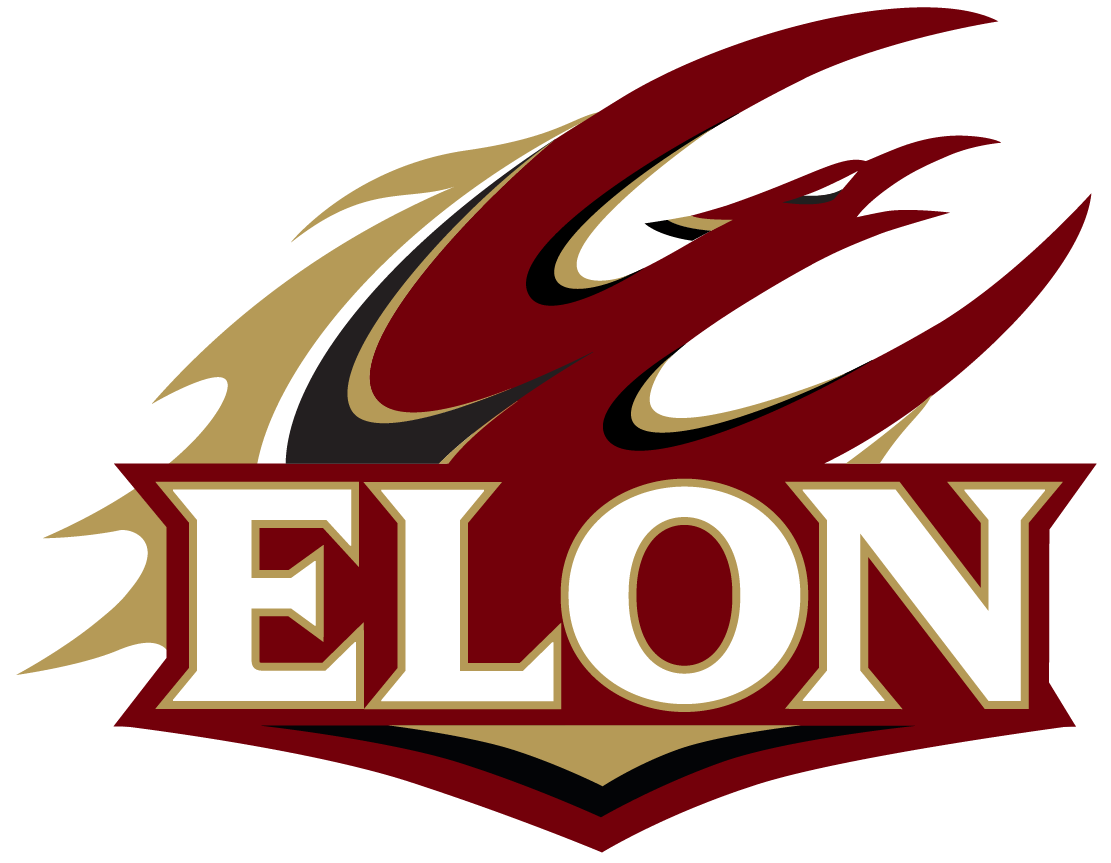
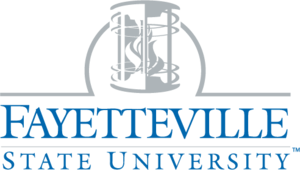
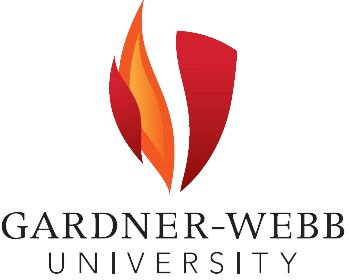
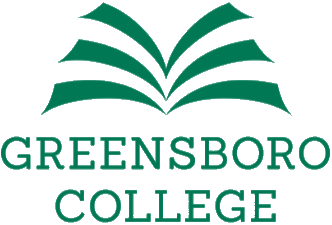
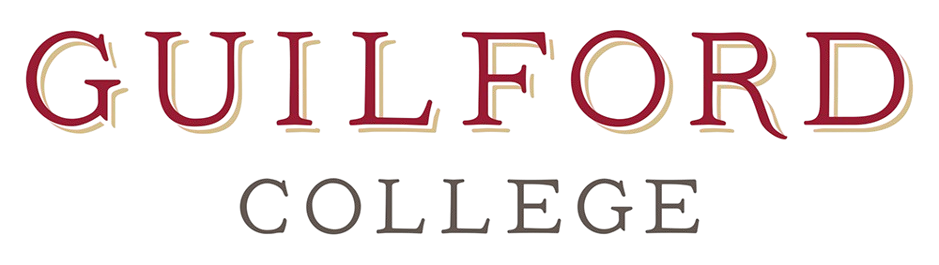
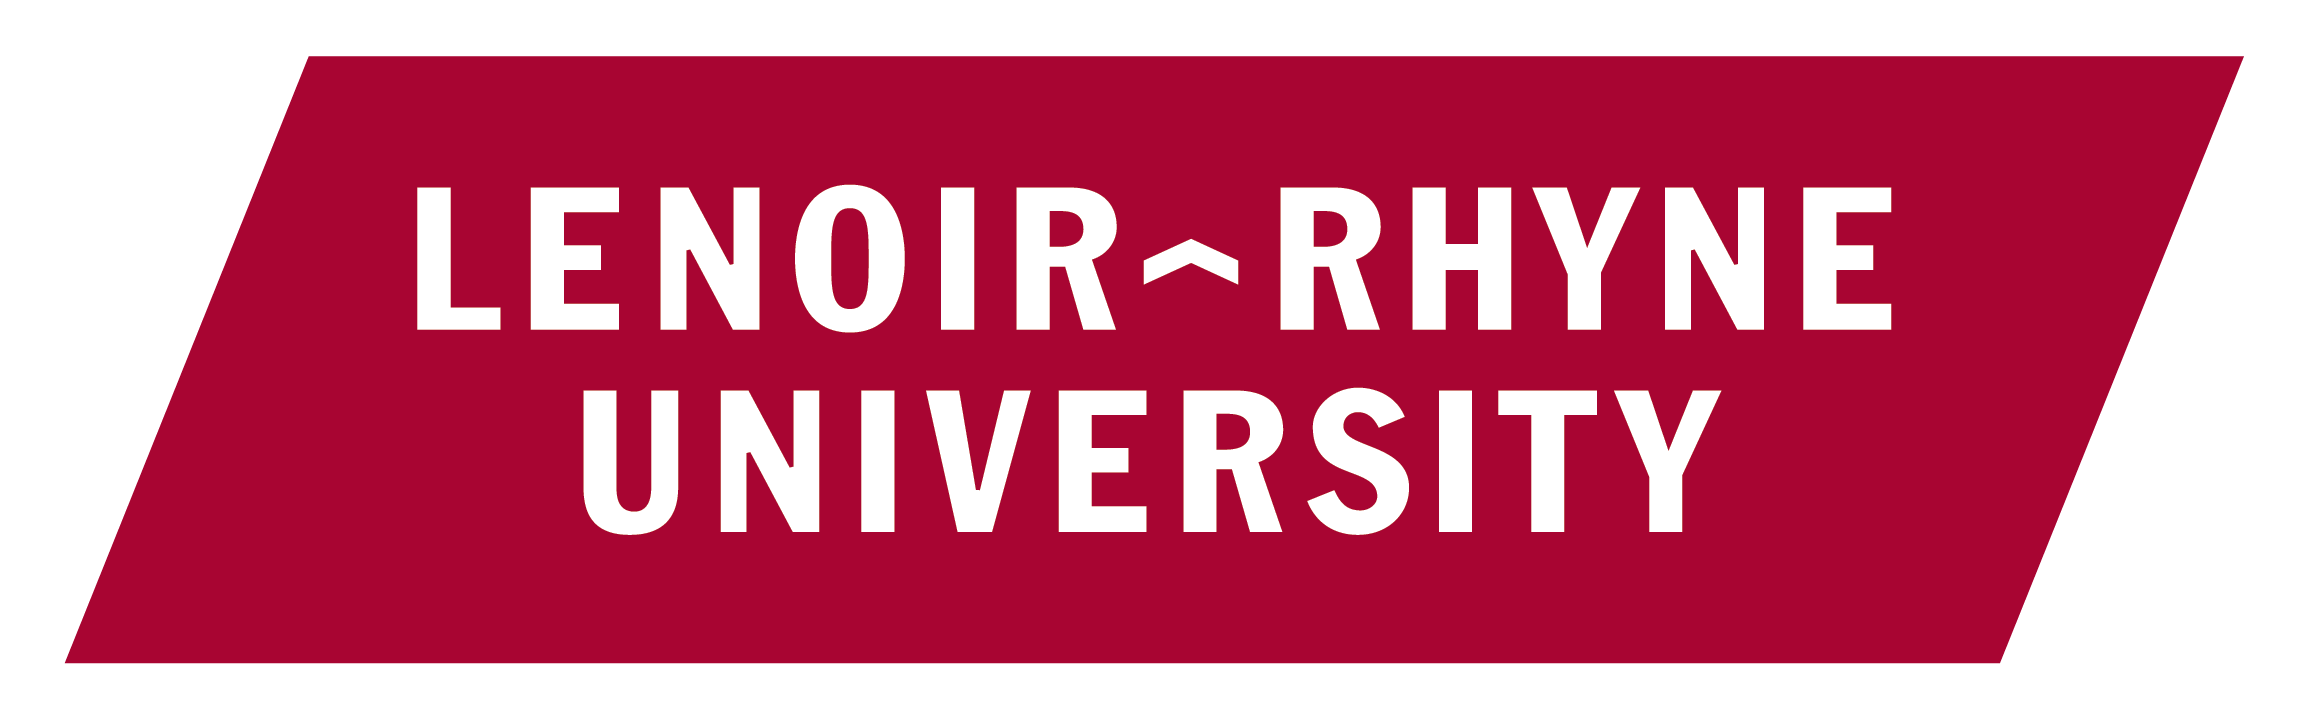
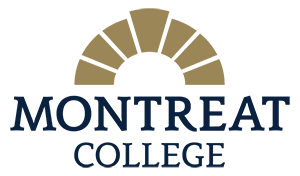
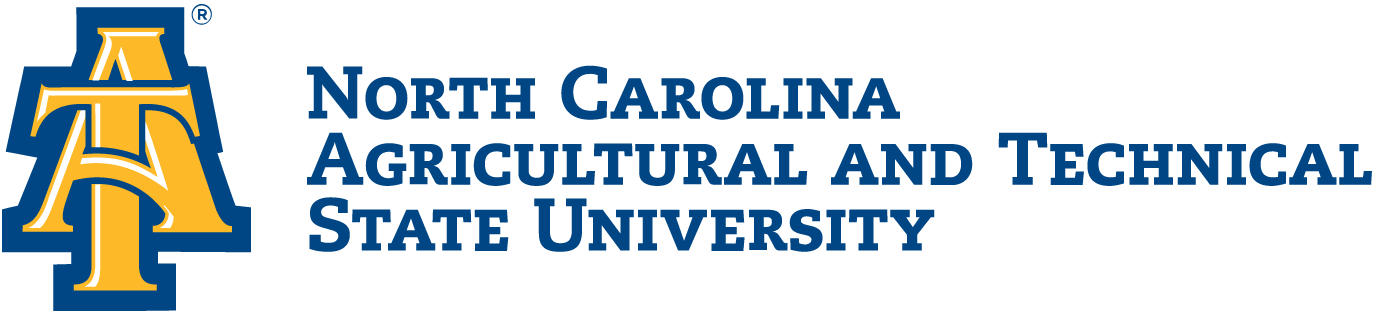
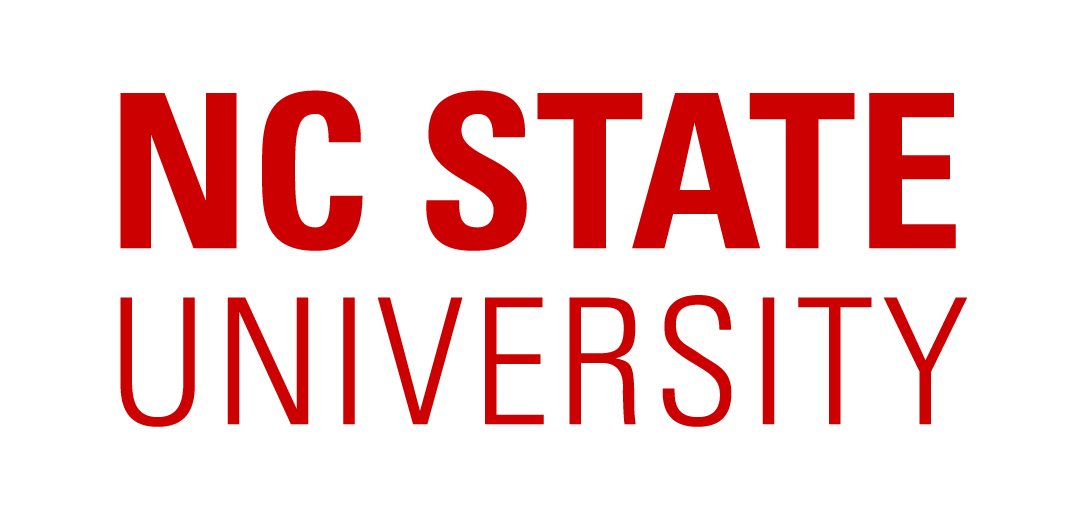
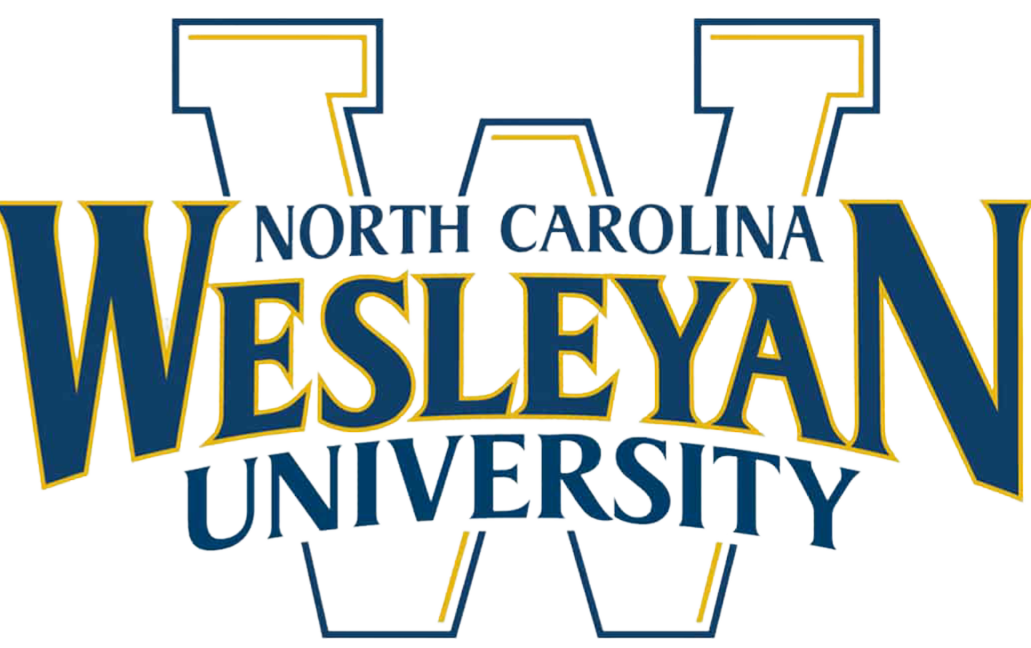
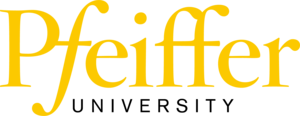
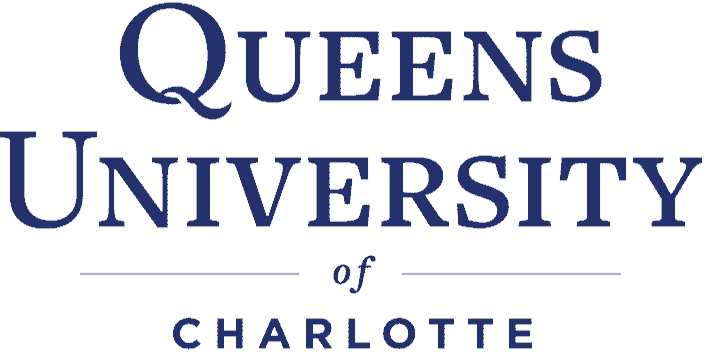
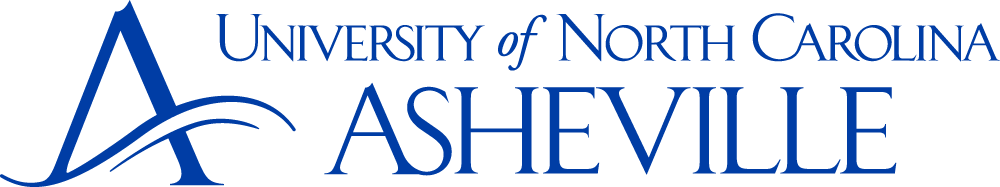
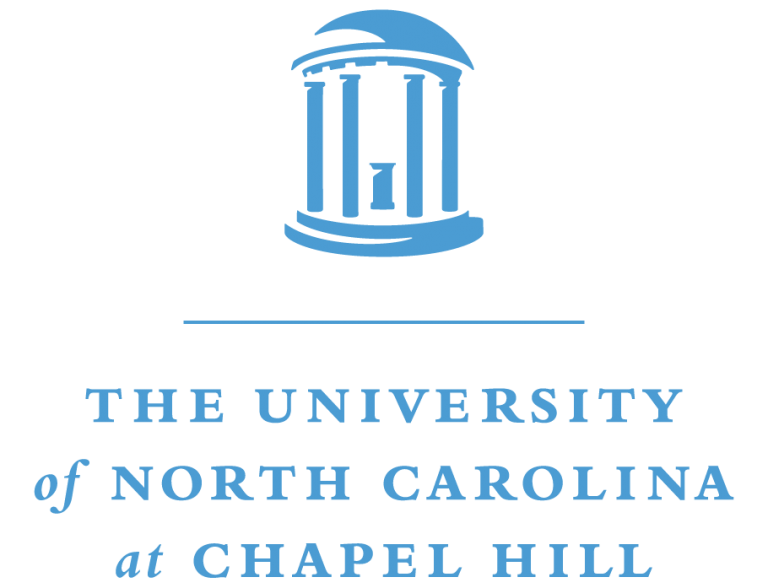
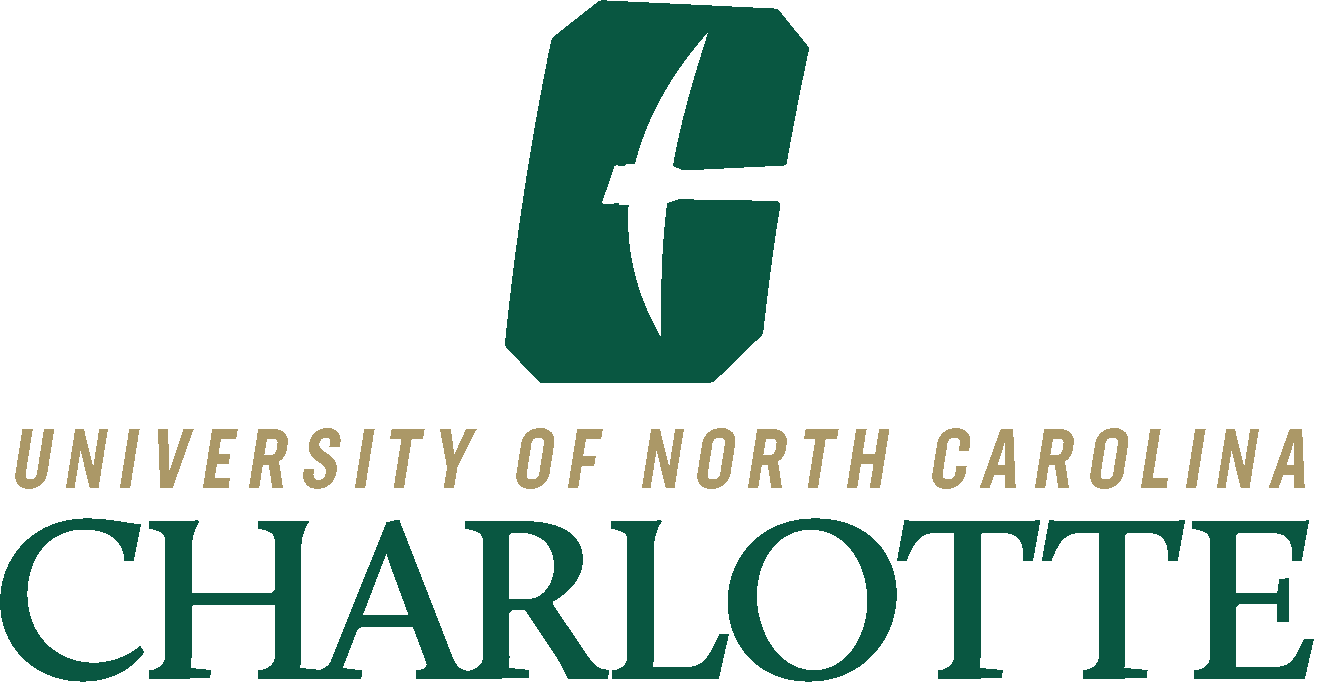
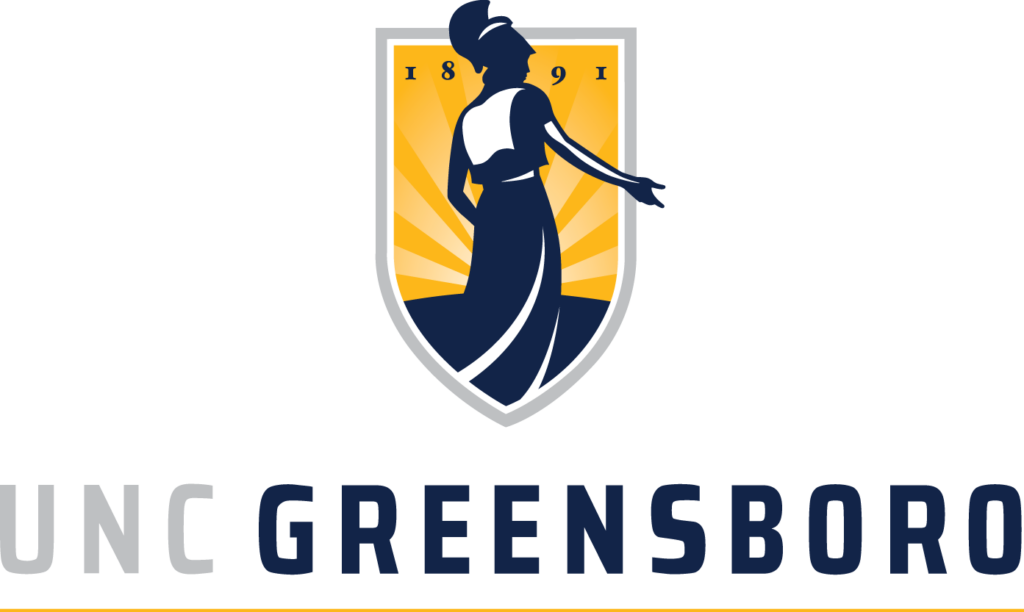
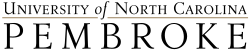
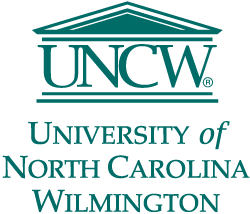
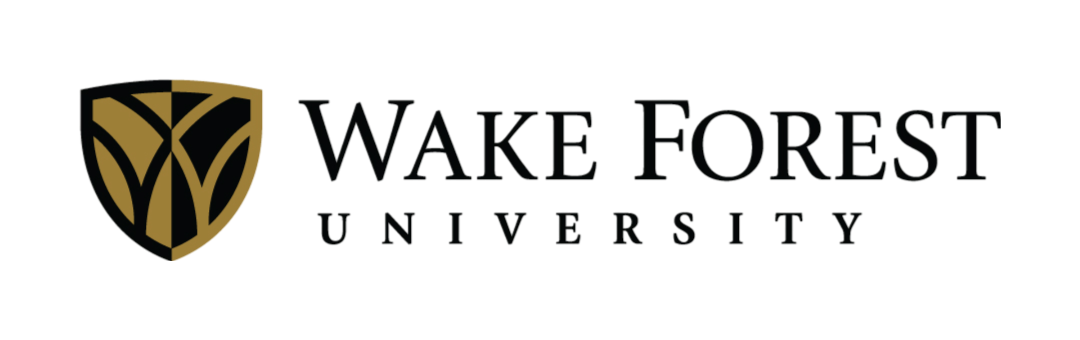
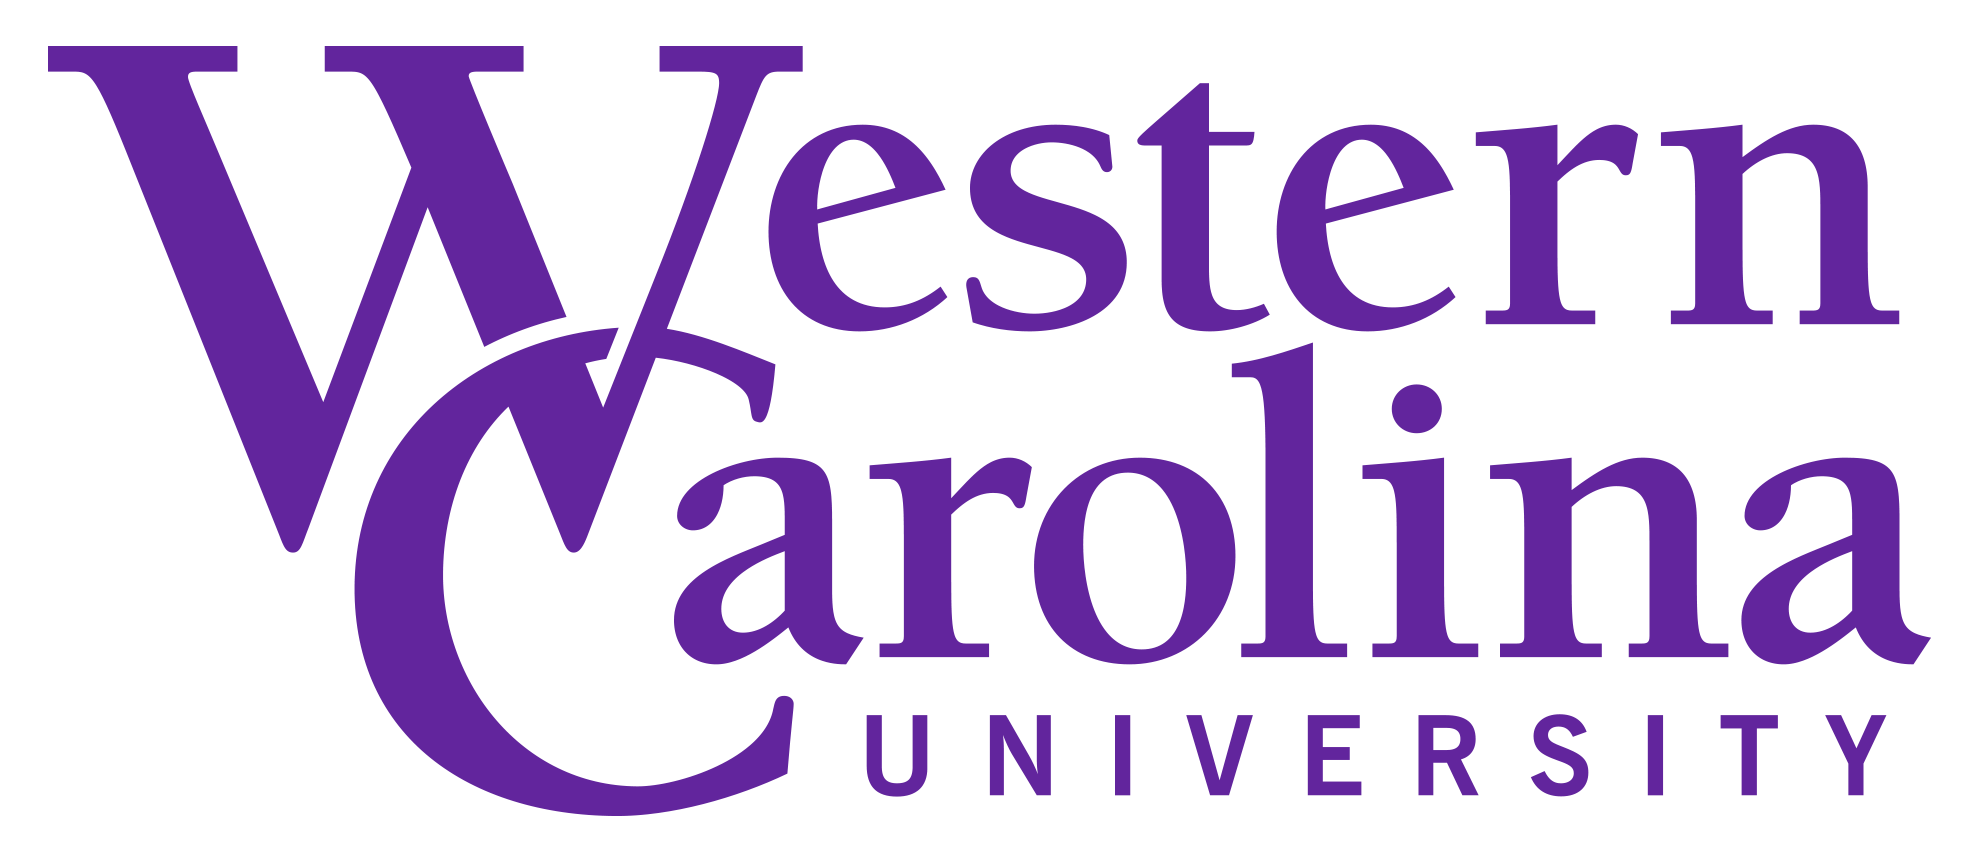

In [44]:
# We have to create a new directory based on the formatting expected by the logos:
# new_path = shutil.copytree('./logos', './table_logos')
new_path = './table_logos'

# for filename in os.listdir(new_path):
#     new_filename = f"{process.extractOne(filename, new_college_names)[0]}.png"
#     os.rename(os.path.join(new_path, filename), os.path.join(new_path, new_filename))

race_tbl = (
    GT(nc_college_race)
    .tab_header(
        title = html("<span style='font-size:36px; font-weight:bold;'>North Carolina Colleges by Racial Makeup</span>"),
        subtitle = html("<span style='font-size:20px; font-weight:bold;'>As Measured in 1998</span>"),
    )
    .tab_source_note(
        source_note = html("Source: <a href='https://nces.ed.gov/ipeds/use-the-data'>National Center for Educational Statistics (IPEDS)</a>")
    )
    .tab_source_note(
        source_note = html("<em>The Diversity Index measures how diverse a population is by subtracting the sum of the squared proportions of each racial group from 1, where higher values mean more diversity (as defined by the <a href='https://www2.census.gov/programs-surveys/demo/about/racial-ethnic-diversity/diversity-index-equation.pdf'>US Census</a>)</em>")
    )
    .tab_options(
        table_font_names=system_fonts("industrial")
    )
    .fmt_integer(
        columns=column_titles[1::], use_seps = True, sep_mark = ','
    )
    .data_color(
        columns=['White', 'Black', 'Diversity Index'],
        palette = 'RdPu',
    )
    .tab_style(
        style=[
            style.text(weight = 'bolder')
            ],
        locations=loc.body(
            columns = 'Black',
            rows = nc_college_race.index[nc_college_race['Name'] == 'North Carolina A & T State University'].tolist()[0]
        )
    )
    .tab_style(
        style=[
            style.text(size = pixel(20))
            ],
        locations=loc.body()
    )
    .tab_style(
        style=[
            style.text(weight = 'bolder')
            ],
        locations=loc.body(
            columns = 'White',
            rows = nc_college_race.index[nc_college_race['Name'] == 'North Carolina State University at Raleigh'].tolist()[0]
        )
    )
    .tab_style(
        style=[
            style.text(weight = 'bolder')
            ],
        locations=loc.body(
            columns = 'Diversity Index',
            rows = nc_college_race.index[nc_college_race['Name'] == 'University of North Carolina at Pembroke'].tolist()[0]
        )
    )
    .fmt_image(
        columns = 'Name',
        path=new_path,
        file_pattern="{}.png",
    )
)


race_tbl.opt_table_outline()

race_tbl.show()

In [46]:
# Save to image
race_tbl.save(
    file = 'visualizations/colleges_by_race.png',
    scale = 2.1,
)

In [13]:
summary_statistics = pd.DataFrame({
    "": ["Expend", "Private", "Room.Board", "SF.Ratio"],
    "Coefficient (Linear)": [0.905623, 0.089715, 0.133713, 0.579761],
    "Importance Level (Decision Tree)": [0.670285, 0.000089, 0.100942, 0.228683]
})

summary_statistics

summary_table = (
    GT(summary_statistics)
    .tab_header(
       title = 'Summary Statistics',
       subtitle= 'Most pertinent variables depending on model utilized'
    )
    .tab_options(
        table_font_names=system_fonts("industrial")
    )
    .tab_style(
        style=[
            style.text(size=24, weight='bold')
        ],
        locations=loc.title()
    )
    .fmt_number(
        columns = ['Coefficient (Linear)', 'Importance Level (Decision Tree)'],
        decimals = 6
    )
    .data_color(
        columns= ['Coefficient (Linear)', 'Importance Level (Decision Tree)'],
        palette = 'RdPu',
    )
    .tab_style(
        style=[
                style.text(weight = 'bolder')
            ],
        locations=loc.body(
            columns = 'Coefficient (Linear)',
            rows = summary_statistics.index[summary_statistics[""] == 'Expend'].tolist()[0]
        )
    )
    .tab_style(
        style=[
                style.text(weight = 'bolder')
            ],
        locations=loc.body(
            columns = 'Importance Level (Decision Tree)',
            rows = summary_statistics.index[summary_statistics[""] == 'Expend'].tolist()[0]
        )
    )
)

summary_table.show()

Summary Statistics 
 
 
 Most pertinent variables depending on model utilized 
 
 
 
 Coefficient (Linear) 
 Importance Level (Decision Tree) 
 
 
 
 
 Expend 
 0.905623 
 0.670285 
 
 
 Private 
 0.089715 
 0.000089 
 
 
 Room.Board 
 0.133713 
 0.100942 
 
 
 SF.Ratio 
 0.579761 
 0.228683

In [481]:
summary_table.save(
    file='visualizations/summary_statistics.png',
    scale = 5
)